<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# Classification with Python

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

*   Confidently create classification models


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['matplotlib'])
await piplite.install(['pandas'])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about the performance of basketball teams. The **cbb.csv** data set includes performance data about five seasons of 354 basketball teams. It includes the following fields:

| Field      | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ---------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| TEAM       | The Division I college basketball school                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| CONF       | The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference) |
| G          | Number of games played                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| W          | Number of games won                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| ADJOE      | Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ADJDE      | Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BARTHAG    | Power Rating (Chance of beating an average Division I team)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| EFG_O      | Effective Field Goal Percentage Shot                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EFG_D      | Effective Field Goal Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| TOR        | Turnover Percentage Allowed (Turnover Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| TORD       | Turnover Percentage Committed (Steal Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| ORB        | Offensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| DRB        | Defensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| FTR        | Free Throw Rate (How often the given team shoots Free Throws)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| FTRD       | Free Throw Rate Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| 2P_O       | Two-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| 2P_D       | Two-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| 3P_O       | Three-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| 3P_D       | Three-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| ADJ_T      | Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| WAB        | Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| POSTSEASON | Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| SEED       | Seed in the NCAA March Madness Tournament                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| YEAR       | Season                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |


### Load Data From CSV File


Let's load the dataset \[NB Need to provide link to csv file]


In [3]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv"
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())
await download(path, "cbb.csv")
            

In [4]:
df = pd.read_csv("cbb.csv")
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [5]:
df.shape

(1406, 24)

## Add Column

Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short.


In [6]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Data visualization and pre-processing


Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.


In [7]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [8]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons.


Lets plot some columns to underestand the data better:


In [9]:
# notice: installing seaborn might takes a few minutes
await piplite.install(['seaborn'])

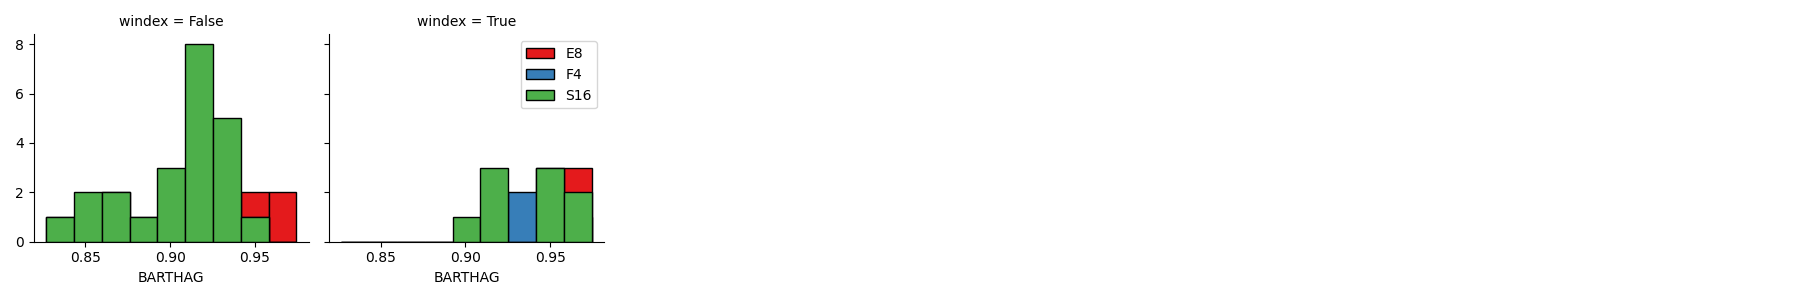

<Figure size 1800x300 with 0 Axes>

In [10]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

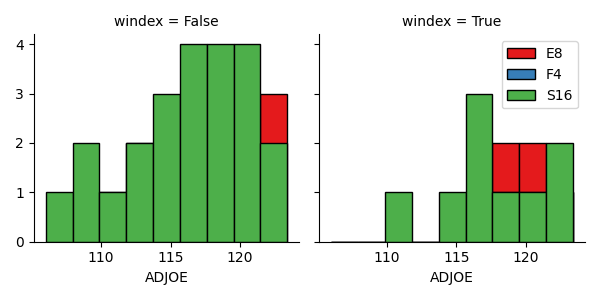

<Figure size 600x300 with 0 Axes>

In [11]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at how Adjusted Defense Efficiency plots


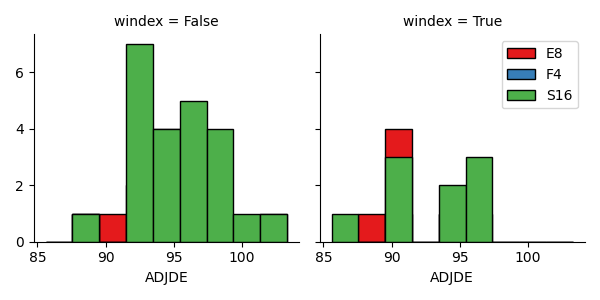

<Figure size 600x300 with 0 Axes>

In [12]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that this data point doesn't impact the ability of a team to get into the Final Four.


## Convert Categorical features to numerical values


Lets look at the postseason:


In [13]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.


Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:


In [14]:
import warnings
warnings.filterwarnings('ignore')
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


### Feature selection


Let's define feature sets, X:


In [15]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|


In [16]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## Normalize Data


Data Standardization gives data zero mean and unit variance (technically should be done after train test split )


In [17]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

## Training and Validation


Split the data into Training and Validation data.


In [18]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression


# K Nearest Neighbor(KNN)

<b>Question  1 </b> Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)


You can use <code> accuracy_score</cdoe>


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# KNN Model (k=5) and prediction
neigh5 = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
neigh5
yhat5 = neigh5.predict(X_val)

#Accuracy on the validation data set (X_val, y_val)
print("Accuracy based on validation data =", np.around(accuracy_score(y_val, neigh5.predict(X_val)),decimals=3))

Accuracy based on validation data = 0.667


<b>Question  2</b> Determine and print the accuracy for the first 15 values of k on the validation data:


Accuracy for k=1,...,15: 
 [0.333 0.333 0.5   0.583 0.667 0.583 0.583 0.667 0.583 0.583 0.583 0.5
 0.583 0.583 0.583]


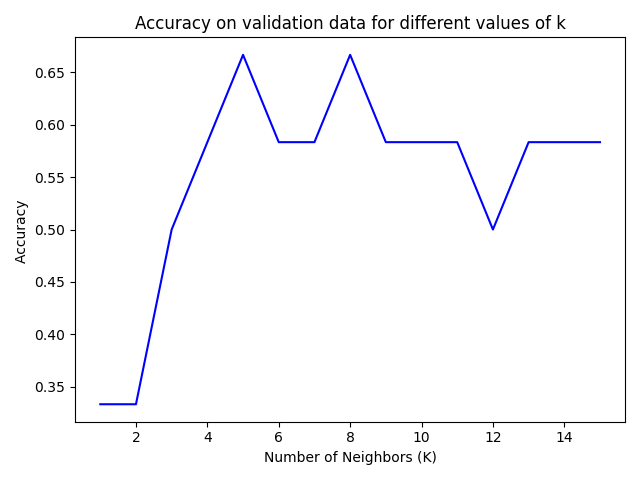

<Figure size 640x480 with 0 Axes>

In [21]:
# Accuracy for different different values of k (k=1,...,15)
K_max = 15
Accuracy_values = np.zeros(K_max, dtype=float)

for i in range(1,K_max+1):
    # Model and accuracy by iteration 
    neigh_i = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat_i=neigh_i.predict(X_val)
    Accuracy_values[i-1] = accuracy_score(y_val, yhat_i)

print("Accuracy for k=1,...,15:", '\n', np.around(Accuracy_values, decimals=3)),

plt.plot(range(1,K_max+1),Accuracy_values,'b')
plt.title('Accuracy on validation data for different values of k')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Decision Tree


The following lines of code fit a <code>DecisionTreeClassifier</code>:


In [22]:
from sklearn.tree import DecisionTreeClassifier

<b>Question  3</b> Determine the minumum   value for the parameter <code>max_depth</code> that improves results


In [23]:
K_max = 10
DTAccuracy_values = np.zeros(K_max,dtype=float)
for i in range(1, K_max+1):
    # Model and accuracy by iteration
    DecisionTree_i = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    DecisionTree_i.fit(X_train,y_train)
    DTyhat_i= DecisionTree_i.predict(X_val)
    DTAccuracy_values[i-1] = accuracy_score(y_val, DTyhat_i)
# Accuracy for different max_depth values   
print("Accuracy for different max_depth:",'\n', np.around(Accuracy_values, decimals=3))


Accuracy for different max_depth: 
 [0.333 0.333 0.5   0.583 0.667 0.583 0.583 0.667 0.583 0.583 0.583 0.5
 0.583 0.583 0.583]


In [24]:
print('\n', "The results of the iterations above show that the accuracy score increases for the first time when k=3; even though higher values can be obtained with higher parameter values.",'\n') 
print("We need to confirm if 3 is the optimal value or not. Let's find the optimal value through parameter tuning",'\n')



 The results of the iterations above show that the accuracy score increases for the first time when k=3; even though higher values can be obtained with higher parameter values. 

We need to confirm if 3 is the optimal value or not. Let's find the optimal value through parameter tuning 




 Tuning - 30 scores with training data: 
 [0.659 0.682 0.841 0.932 0.977 1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.   ] 

Tuning - 30 scores with validation data: 
 [0.667 0.667 0.5   0.333 0.5   0.417 0.5   0.5   0.5   0.5   0.417 0.417
 0.5   0.5   0.417 0.417 0.5   0.5   0.417 0.5   0.417 0.5   0.417 0.5
 0.5   0.5   0.417 0.5   0.417 0.417]


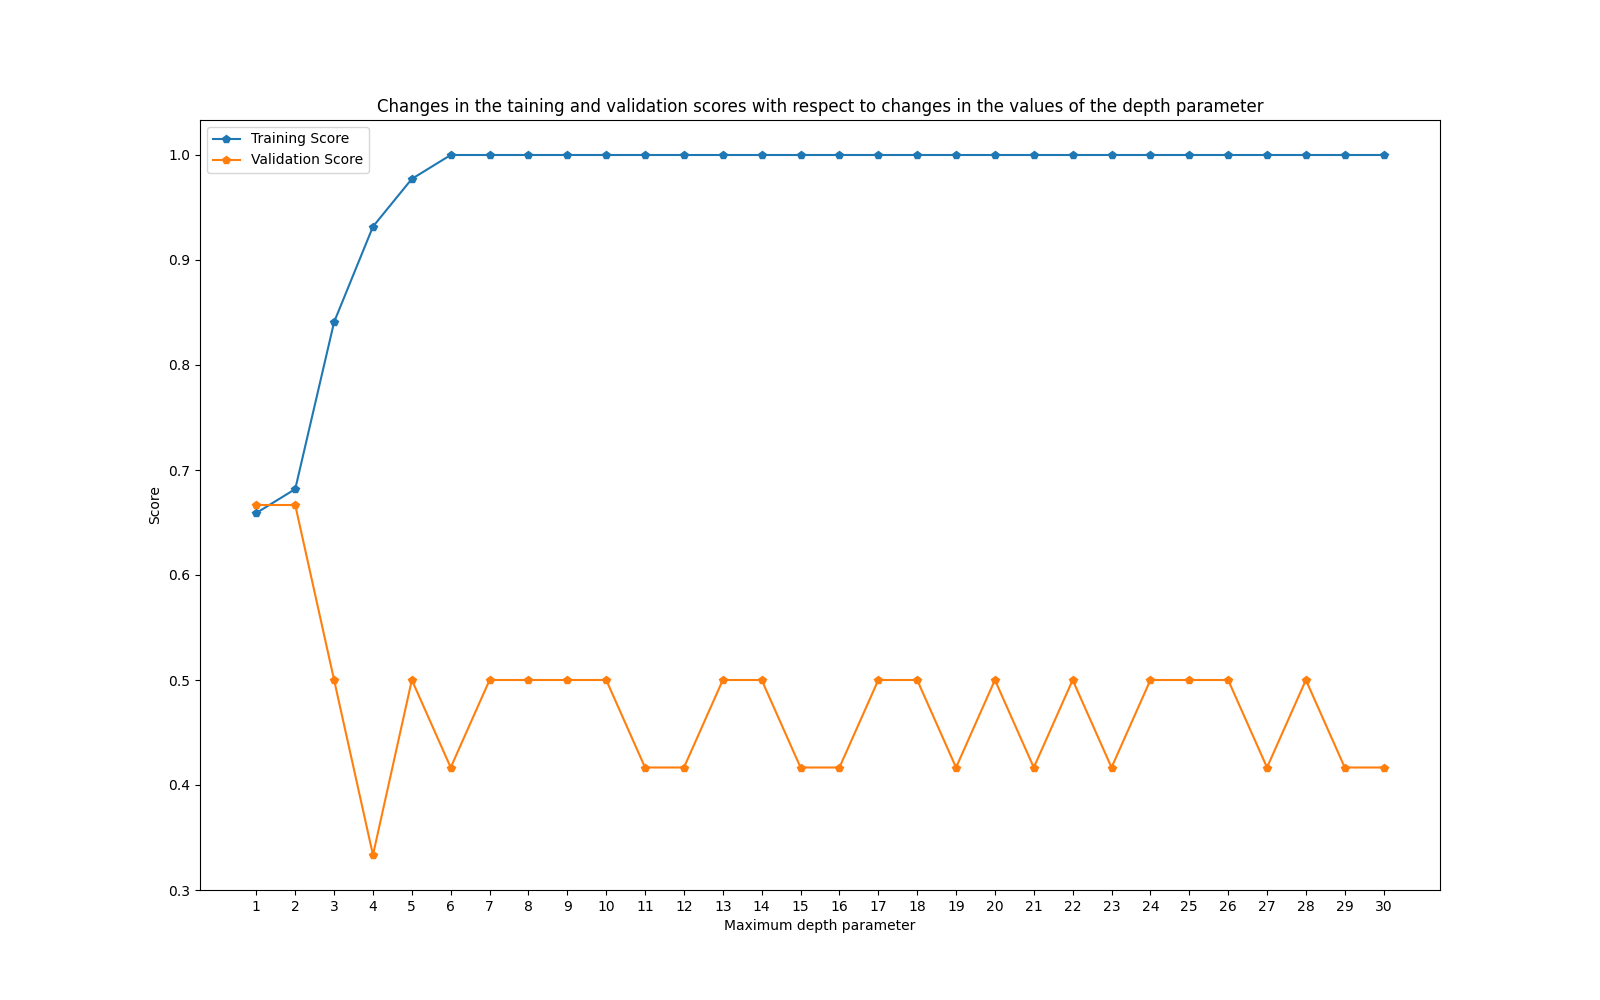

<Figure size 1600x1000 with 0 Axes>

In [25]:
# Hyperparemer tuning. 
#This code aims to show how good is the decision tree for both train and validation datasets and for different values of max_depth parameter.    

K =30                           # Number of values being assigned: max_depth =1,2,....30 .
TrainAccuracy =[]               # To store accuracy values on the train dataset 
ValidAccuracy =[]               # To store accuracy values on the validation dataset 
depthParameters =range (1, K+1) # List of possible values of parameter values, k=1, ..., k

for i in depthParameters:
    ModelTemporary = DecisionTreeClassifier(criterion='entropy', max_depth =i, splitter='best')
    ModelTemporary.fit(X_train,y_train)
    TrainAccuracy.append(ModelTemporary.score(X_train,y_train))
    ValidAccuracy.append(ModelTemporary.score(X_val,y_val))
print('\n',"Tuning - 30 scores with training data:",'\n', np.around(TrainAccuracy, decimals=3),'\n')
print("Tuning - 30 scores with validation data:", '\n', np.around(ValidAccuracy, decimals=3))

plt.figure(figsize=([16,10]))
plt.plot(depthParameters,TrainAccuracy, label='Training Score', marker='p')
plt.plot(depthParameters,ValidAccuracy, label='Validation Score' , marker='p')
plt.xlabel('Maximum depth parameter')
plt.ylabel('Score')
plt.title('Changes in the taining and validation scores with respect to changes in the values of the depth parameter')
plt.xticks(depthParameters)
plt.legend()
plt.show()      

In [26]:
print('\n', "\u0332".join('Comments'),'\n')
print("We observe that for max_depth parameter in {1,2}, the scores from the training and validation data are close.")
print("However for higher values of the depth paramater (>=3), the scores increase with the train data but fluctuate at a lower level on the validation data.")
print("With larger values of max_depth (>5), the model can even fit with 100% accuracy on the training dataset, but at the cost of bad or lower accuracy on the validation dataset",'\n')
print("k=3 appears to be the best choice in order to keep a good trade-off. Optimal max_depth=3:") 
print("Among all values of the depth parameter for which the validation score is high (around 50%), k=3 gives the smallest difference between scores from the training and the validation data",'\n') 


 C̲o̲m̲m̲e̲n̲t̲s 

We observe that for max_depth parameter in {1,2}, the scores from the training and validation data are close.
However for higher values of the depth paramater (>=3), the scores increase with the train data but fluctuate at a lower level on the validation data.
With larger values of max_depth (>5), the model can even fit with 100% accuracy on the training dataset, but at the cost of bad or lower accuracy on the validation dataset 

k=3 appears to be the best choice in order to keep a good trade-off. Optimal max_depth=3:
Among all values of the depth parameter for which the validation score is high (around 50%), k=3 gives the smallest difference between scores from the training and the validation data 



In [27]:
# Final Decicision Tree model (with max_depth=3) 
DecisionTree_3 = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
DecisionTree_3.fit(X_train,y_train)
DTyhat_Train= DecisionTree_3.predict(X_train)
DTyhat_val= DecisionTree_3.predict(X_val)
print('\n', "***********************Performance of the retained Decision Tree ****************************************",'\n')
print("Accuracy score on the training data   = ", np.round(accuracy_score(y_train, DTyhat_Train), decimals=3))
print("Accuracy score on the validation data = ", np.round(accuracy_score(y_val, DTyhat_val), decimals=3))


 ***********************Performance of the retained Decision Tree **************************************** 

Accuracy score on the training data   =  0.841
Accuracy score on the validation data =  0.5


# Support Vector Machine


<b>Question  4</b> Train the support  vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.


In [28]:
from sklearn import svm

In [29]:
from sklearn.metrics import f1_score, jaccard_score

# Kernel =Linear
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train) 
yhat_linear=clf_linear.predict(X_val)

# Kernel =polynomial
clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train, y_train)
yhat_poly=clf_poly.predict(X_val)

# Kernel =rbf
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
yhat_rbf=clf_rbf.predict(X_val)

# Kernel =sigmoid
clf_sigmoid = svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(X_train, y_train) 
yhat_sigmoid=clf_sigmoid.predict(X_val)


# Accuracy on the validation dataset: We compute the accuracy score, the f1_score and the jaccard_score

print("**************** Validation data Performance Comparaison****************")
print("******************************Accuracy Score ***************************")
print("Kernel = Linear;                Accuracy score = ", np.round(accuracy_score(y_val, yhat_linear), decimals=3))
print("Kernel = Polynomial;            Accuracy score = ", np.round(accuracy_score(y_val, yhat_poly), decimals=3))
print("Kernel = Radial Basis Function; Accuracy score = ", np.round(accuracy_score(y_val, yhat_rbf), decimals=3))
print("Kernel = Sigmoid;               Accuracy Score = ", np.round(accuracy_score(y_val, yhat_sigmoid), decimals=3))

print("*******************Confirmation of the results above*********************")

print("********************* Confirmation with F1 Score ************************")
print("Kernel = Linear;                 F1 score = ", np.round(f1_score(y_val, yhat_linear, average='weighted'), decimals=3))
print("Kernel = Polynomial;             F1 score = ", np.round(f1_score(y_val, yhat_poly, average='weighted'), decimals=3))
print("Kernel = Radial Basis Function;  F1 score = ", np.round(f1_score(y_val, yhat_rbf, average='weighted'), decimals=3))
print("Kernel = Sigmoid;                F1 score = ", np.round(f1_score(y_val, yhat_sigmoid, average='weighted'), decimals=3))

print("*********************Confirmation with Jaccard Score ********************")
print("Kernel = Linear;                Jaccard score = ", np.round(jaccard_score(y_val, yhat_linear, average='weighted'), decimals=3))
print("Kernel = Polynomial;            Jaccard Score = ", np.round(jaccard_score(y_val, yhat_poly, average='weighted'), decimals=3))
print("Kernel = Radial Basis Function; Jaccard score = ", np.round(jaccard_score(y_val, yhat_rbf, average='weighted'), decimals=3))
print("Kernel = Sigmoid;               Jaccard score = ", np.round(jaccard_score(y_val, yhat_sigmoid, average='weighted'), decimals=3))

**************** Validation data Performance Comparaison****************
******************************Accuracy Score ***************************
Kernel = Linear;                Accuracy score =  0.25
Kernel = Polynomial;            Accuracy score =  0.667
Kernel = Radial Basis Function; Accuracy score =  0.583
Kernel = Sigmoid;               Accuracy Score =  0.583
*******************Confirmation of the results above*********************
********************* Confirmation with F1 Score ************************
Kernel = Linear;                 F1 score =  0.242
Kernel = Polynomial;             F1 score =  0.533
Kernel = Radial Basis Function;  F1 score =  0.491
Kernel = Sigmoid;                F1 score =  0.537
*********************Confirmation with Jaccard Score ********************
Kernel = Linear;                Jaccard score =  0.142
Kernel = Polynomial;            Jaccard Score =  0.444
Kernel = Radial Basis Function; Jaccard score =  0.389
Kernel = Sigmoid;               Jaccard 

In [30]:
print('\n'"Based on the accuracy score, it appears that the polynomial kernal provides the best score. This is confirmed with the F1 and Jaccard scores.")
print("The polynomial kernel is retained to train the model", '\n')


Based on the accuracy score, it appears that the polynomial kernal provides the best score. This is confirmed with the F1 and Jaccard scores.
The polynomial kernel is retained to train the model 



In [31]:
# Model train with the polynomial kernel
clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train, y_train)
yhat_poly=clf_poly.predict(X_val)

#Performance Evaluation
print('\n', "*********************** Perfomance Evaluation of SVM with polynomial kernel on validation data*******************",'\n')

Accuracy = np.round(accuracy_score(y_val, yhat_poly), decimals=3)
print("Accuracy score = ", Accuracy)
F1=np.round(f1_score(y_val, yhat_poly, average='weighted'), decimals=3)
print("F1 score       = ",F1,)
Jaccard =np.round(jaccard_score(y_val, yhat_poly, average='weighted'), decimals=3)
print("Jaccard Score  = ", Jaccard)


 *********************** Perfomance Evaluation of SVM with polynomial kernel on validation data******************* 

Accuracy score =  0.667
F1 score       =  0.533
Jaccard Score  =  0.444


# Logistic Regression


<b>Question 5</b> Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
LogReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LogReg
yhat_LogReg = LogReg.predict(X_val)
yhat_LogReg_Prob = LogReg.predict_proba(X_val)
yhat_LogReg
yhat_LogReg_Prob

array([[0.31220273, 0.3562491 , 0.33154818],
       [0.32510152, 0.32839869, 0.34649979],
       [0.36167465, 0.30610437, 0.33222097],
       [0.38701793, 0.35317957, 0.2598025 ],
       [0.35426016, 0.32763412, 0.31810573],
       [0.34432475, 0.31699257, 0.33868268],
       [0.32217474, 0.33545881, 0.34236644],
       [0.32767214, 0.34639684, 0.32593102],
       [0.34880289, 0.31865572, 0.33254139],
       [0.32108525, 0.30666601, 0.37224874],
       [0.34287302, 0.30377031, 0.35335668],
       [0.33284243, 0.29291228, 0.3742453 ]])

# Model Evaluation using Test set


In [34]:
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

In [35]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

<b>Question  5</b> Calculate the  F1 score and Jaccard score for each model from above. Use the Hyperparameter that performed best on the validation data. **For f1\_score please set the average parameter to 'micro'.**


### Load Test set for evaluation


In [36]:
await download("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv", "basketball_train.csv")
test_df = pd.read_csv("basketball_train.csv")
test_df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [37]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

array([[-4.08074446e-01, -1.10135297e+00,  3.37365934e-01,
         2.66479976e+00, -2.46831661e+00,  2.13703245e-01,
         9.44090550e-01, -1.19216365e+00, -1.64348924e+00,
         1.45405982e-02,  1.29523097e+00, -6.23533182e-01,
        -9.31788560e-01,  1.42784371e-01,  1.68876201e-01,
         2.84500844e-01,  1.62625961e+00, -8.36649260e-01,
        -9.98500539e-01,  4.84319174e-01, -6.77003200e-01],
       [ 3.63958290e-01,  3.26326807e-01,  7.03145068e-01,
        -7.13778644e-01,  1.07370841e+00,  4.82633172e-01,
         4.77498943e-01, -1.32975879e+00, -6.86193316e-02,
        -7.35448152e-01, -1.35447914e+00, -8.06829025e-01,
         3.41737757e-01,  4.96641291e-02,  9.40576311e-02,
         1.37214061e+00,  6.93854620e-01, -2.00860931e+00,
         9.80549967e-01, -1.19401460e+00,  1.47709789e+00],
       [ 3.63958290e-01,  1.18293467e+00,  9.31757027e-01,
        -8.78587347e-01,  1.23870131e+00,  7.85179340e-01,
        -9.22275877e-01,  5.27775662e-01, -1.86734575e

In [38]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

KNN


In [39]:
# Reminder from questions 1 and 2: neigh5 = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)

#Model predictions for the Test set
test_yhat5 = neigh5.predict(test_X)

# Evaluation: Accuracy, Jaccard Score (2 methods) and F1-Score.
#Accuracy
Accuracy_KNN=accuracy_score(test_y, test_yhat5)

#Jaccard Score: We use two methods.
# Method 1: Using "jaccard_score(.,.,.)" from the  sklearn library  (from sklearn.metrics import f1_score, jaccard_score)
Jaccard1_KNN = jaccard_score(test_y,test_yhat5, average='weighted')
# Method 2: Using "jaccard_index function in this lab (jaccard_index(predictions, true))
Jaccard2_KNN =jaccard_index(test_yhat5, test_y)

#F1 Score
F1_Score_KNN=f1_score(test_y, test_yhat5, average='micro')

print('\n',"\u0332".join("Results for KNN on Test data"))
print("-------------------------------------------------------------------------------------------------------------")
print("KNN - Accuracy Score on Test data = ", np.round(Accuracy_KNN, decimals=3))
print("KNN - Jaccard Score on Test data  = ",np.round(Jaccard1_KNN, decimals=3),"; using the function from sklearn.metric")
print("KNN - Jaccard Index on Test data  = ",np.round(Jaccard2_KNN, decimals=3),"; using the function provided in this lab")
print("KNN - F1 Score on Test data       = ", np.round(F1_Score_KNN, decimals=3))
print("-------------------------------------------------------------------------------------------------------------",'\n')


 R̲e̲s̲u̲l̲t̲s̲ ̲f̲o̲r̲ ̲K̲N̲N̲ ̲o̲n̲ ̲T̲e̲s̲t̲ ̲d̲a̲t̲a
-------------------------------------------------------------------------------------------------------------
KNN - Accuracy Score on Test data =  0.629
KNN - Jaccard Score on Test data  =  0.464 ; using the function from sklearn.metric
KNN - Jaccard Index on Test data  =  0.458 ; using the function provided in this lab
KNN - F1 Score on Test data       =  0.629
------------------------------------------------------------------------------------------------------------- 



Decision Tree


In [40]:
# Reminder from question 3: DecisionTree_3 = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Decision Tree #Model predictions for the Test set
test_yhatDT = DecisionTree_3.predict(test_X)

# Evaluation: Accuracy, Jaccard Score (2 methods) and F1-Score.

#Accuracy
Accuracy_DT=accuracy_score(test_y, test_yhatDT)

#Jaccard Score: We use two methods.
# Method 1: Using "jaccard_score(.,.,.)" from the  sklearn library  (from sklearn.metrics import f1_score, jaccard_score)
Jaccard1_DT = jaccard_score(test_y,test_yhatDT, average='weighted')
# Method 2: Using "jaccard_index function in this lab (jaccard_index(predictions, true))
Jaccard2_DT =jaccard_index(test_yhatDT, test_y)

#F1 Score
F1_Score_DT=f1_score(test_y, test_yhatDT, average='micro')

print('\n',"\u0332".join("Results for Decision Tree on Test data"))
print("-------------------------------------------------------------------------------------------------------------")
print("Decision Tree - Accuracy Score on Test data = ", np.round(Accuracy_DT, decimals=3))
print("Decision Tree - Jaccard Score on Test data  = ",np.round(Jaccard1_DT, decimals=3), "; using the function from sklearn.metric")
print("Decision Tree - Jaccard Indexon Test data   = ",np.round(Jaccard2_DT, decimals=3), "; using the function provided in this lab")
print("Decision Tree - F1 Score on Test data       = ", np.round(F1_Score_DT, decimals=3))
print("-------------------------------------------------------------------------------------------------------------",'\n')


 R̲e̲s̲u̲l̲t̲s̲ ̲f̲o̲r̲ ̲D̲e̲c̲i̲s̲i̲o̲n̲ ̲T̲r̲e̲e̲ ̲o̲n̲ ̲T̲e̲s̲t̲ ̲d̲a̲t̲a
-------------------------------------------------------------------------------------------------------------
Decision Tree - Accuracy Score on Test data =  0.7
Decision Tree - Jaccard Score on Test data  =  0.553 ; using the function from sklearn.metric
Decision Tree - Jaccard Indexon Test data   =  0.538 ; using the function provided in this lab
Decision Tree - F1 Score on Test data       =  0.7
------------------------------------------------------------------------------------------------------------- 



SVM


In [41]:
# Reminder from question 4: clf_poly = svm.SVC(kernel='poly')

# SVM Model predictions for the Test set
test_yhatSVM = clf_poly.predict(test_X)

# Evaluation: Accuracy, Jaccard Score (2 methods) and F1-Score.
#Accuracy
Accuracy_SVM=accuracy_score(test_y, test_yhatSVM)

#Jaccard Score: We use two methods.
# Method 1: Using "jaccard_score(.,.,.)" from the  sklearn library  (from sklearn.metrics import f1_score, jaccard_score)
Jaccard1_SVM = jaccard_score(test_y,test_yhatSVM, average='weighted')
# Method 2: Using "jaccard_index function in this notebook (jaccard_index(predictions, true))
Jaccard2_SVM =jaccard_index(test_yhatSVM, test_y)

#F1 Score
F1_Score_SVM=f1_score(test_y, test_yhatSVM, average='micro')

print('\n',"\u0332".join("Results for SVM on Test data"))
print("-------------------------------------------------------------------------------------------------------------")
print("SVM - Accuracy Score on Test data = ",np.round(Accuracy_SVM, decimals=3))
print("SVM - Jaccard Score on Test data  = ",np.round(Jaccard1_SVM, decimals=3), "; using the function from sklearn.metric")
print("SVM - Jaccard Index on Test data  = ",np.round(Jaccard2_SVM, decimals=3),"; using the function provided in this lab")
print("SVM - F1 Score on Test data       = ", np.round(F1_Score_SVM, decimals=3))
print("-------------------------------------------------------------------------------------------------------------",'\n')


 R̲e̲s̲u̲l̲t̲s̲ ̲f̲o̲r̲ ̲S̲V̲M̲ ̲o̲n̲ ̲T̲e̲s̲t̲ ̲d̲a̲t̲a
-------------------------------------------------------------------------------------------------------------
SVM - Accuracy Score on Test data =  0.686
SVM - Jaccard Score on Test data  =  0.494 ; using the function from sklearn.metric
SVM - Jaccard Index on Test data  =  0.522 ; using the function provided in this lab
SVM - F1 Score on Test data       =  0.686
------------------------------------------------------------------------------------------------------------- 



Logistic Regression


In [42]:
# Reminder from question 5: LogReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

#Logistic Model predictions for the Test set
test_yhatlogi = LogReg.predict(test_X)
test_yhatlogiProba = LogReg.predict_proba(test_X)

# Evaluation: Accuracy, Jaccard Score (2 methods) and F1-Score.
#Accuracy
Accuracy_logi=accuracy_score(test_y, test_yhatlogi)

#Jaccard Score: We use two methods.
# Method 1: Using "jaccard_score(.,.,.)" from the  sklearn library  (from sklearn.metrics import f1_score, jaccard_score)
Jaccard1_logi = jaccard_score(test_y,test_yhatlogi, average='weighted')

# Method 2: Using "jaccard_index function in this notebook (jaccard_index(predictions, true))
Jaccard2_logi =jaccard_index(test_yhatlogi, test_y)

#F1 Score
F1_Score_logi=f1_score(test_y, test_yhatlogi, average='micro')

# Log Loss
LogLoss_logi =np.round(log_loss(test_y, test_yhatlogiProba), decimals=3)

print('\n',"\u0332".join("Results for logistic regression on Test data"))
print("-------------------------------------------------------------------------------------------------------------")
print("Logistic - Accuracy Score on Test data = ", np.round(Accuracy_logi, decimals=3))
print("Logistic - Jaccard Score on Test data  = ", np.round(Jaccard1_logi, decimals=3), "; using the function from sklearn.metric")
print("Logistic - Jaccard Index on Test data  = ",np.round(Jaccard2_logi, decimals=3),  "; using with the function provided in this lab")
print("Logistic - F1 Score on Test data       = ", np.round(F1_Score_logi, decimals=3))
print("Logistic - LogLoss on Test data        = ", np.round(LogLoss_logi, decimals=3))
print("-------------------------------------------------------------------------------------------------------------",'\n')


 R̲e̲s̲u̲l̲t̲s̲ ̲f̲o̲r̲ ̲l̲o̲g̲i̲s̲t̲i̲c̲ ̲r̲e̲g̲r̲e̲s̲s̲i̲o̲n̲ ̲o̲n̲ ̲T̲e̲s̲t̲ ̲d̲a̲t̲a
-------------------------------------------------------------------------------------------------------------
Logistic - Accuracy Score on Test data =  0.686
Logistic - Jaccard Score on Test data  =  0.531 ; using the function from sklearn.metric
Logistic - Jaccard Index on Test data  =  0.522 ; using with the function provided in this lab
Logistic - F1 Score on Test data       =  0.686
Logistic - LogLoss on Test data        =  1.037
------------------------------------------------------------------------------------------------------------- 



In [43]:
print("-------------------------------------------------------------------------------------------------------------")
print("Report of the evaluation results from the 4 algorithms")
print("Results of the evaluation of the KNN, DT, SVM and logistic models on the Test data are summarized in the table below")
print("-------------------------------------------------------------------------------------------------------------",'\n')

-------------------------------------------------------------------------------------------------------------
Report of the evaluation results from the 4 algorithms
Results of the evaluation of the KNN, DT, SVM and logistic models on the Test data are summarized in the table below
------------------------------------------------------------------------------------------------------------- 



In [44]:
### Print the evealuation report as a table
await piplite.install(['tabulate'])
from tabulate import tabulate
result_dict = {'Algorithm': ['KNN', 'Decision Tree' , 'SVM' , 'LogisticRegression'], 'Accuracy': [Accuracy_KNN, Accuracy_DT, Accuracy_SVM, Accuracy_logi], 'Jaccard1': [Jaccard1_KNN, Jaccard1_DT, Jaccard1_SVM, Jaccard1_logi], 'Jaccard2': [Jaccard2_KNN, Jaccard2_DT, Jaccard2_SVM, Jaccard2_logi] , 'F1-Score': [F1_Score_KNN, F1_Score_DT, F1_Score_SVM, F1_Score_logi] , 'LogLoss': ["NA","NA","NA", LogLoss_logi]}
df_report = pd.DataFrame(result_dict, columns=['Algorithm', 'Accuracy', 'Jaccard1', 'Jaccard2', 'F1-Score', 'LogLoss'])
df_report=np.round(df_report, decimals=3)
print('\n')
print("\u0332".join("Comment"))
print("In the report below, Jaccard1 refers to the Jaccard score computed directly with the ""Jaccard_function"" from the Sklearn library. ")
print("Jaccard2 refers to the results of the same evaluation, but using the ""Jaccard_index"" function provided in the assignment")
print('\n')
print("\u0332".join("Report"))
print(tabulate(df_report, headers='keys', tablefmt='fancy_grid'))



C̲o̲m̲m̲e̲n̲t
In the report below, Jaccard1 refers to the Jaccard score computed directly with the Jaccard_function from the Sklearn library. 
Jaccard2 refers to the results of the same evaluation, but using the Jaccard_index function provided in the assignment


R̲e̲p̲o̲r̲t
╒════╤════════════════════╤════════════╤════════════╤════════════╤════════════╤═══════════╕
│    │ Algorithm          │   Accuracy │   Jaccard1 │   Jaccard2 │   F1-Score │ LogLoss   │
╞════╪════════════════════╪════════════╪════════════╪════════════╪════════════╪═══════════╡
│  0 │ KNN                │      0.629 │      0.464 │      0.458 │      0.629 │ NA        │
├────┼────────────────────┼────────────┼────────────┼────────────┼────────────┼───────────┤
│  1 │ Decision Tree      │      0.7   │      0.553 │      0.538 │      0.7   │ NA        │
├────┼────────────────────┼────────────┼────────────┼────────────┼────────────┼───────────┤
│  2 │ SVM                │      0.686 │      0.494 │      0.522 │      0.686 

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Accuracy | Jaccard | F1-score | LogLoss |
| ------------------ | -------- | ------- | -------- | ------- |
| KNN                | ?        | ?       | ?        | NA      |
| Decision Tree      | ?        | ?       | ?        | NA      |
| SVM                | ?        | ?       | ?        | NA      |
| LogisticRegression | ?        | ?       | ?        | ?       |


Something to keep in mind when creating models to predict the results of basketball tournaments or sports in general is that is quite hard due to so many factors influencing the game. Even in sports betting an accuracy of 55% and over is considered good as it indicates profits.


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>


### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                       |
| ----------------- | ------- | ------------- | ---------------------------------------- |
| 2022-11-29        | 2.2     | Anita Verma   | Converted initial version to Jupyterlite |
| 2021-04-03        | 2.1     | Malika Singla | Updated the Report accuracy              |
| 2020-08-27        | 2.0     | Lavanya       | Moved lab to course repo in GitLab       |
|                   |         |               |                                          |
|                   |         |               |                                          |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
